In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

2025-01-03 10:28:22.179055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735880302.262113  159613 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735880302.283371  159613 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-03 10:28:22.438022: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Define parameters
IMAGE_SIZE = (64, 64)
BATCH_SIZE = 20
DATA_PATH = "/home/ashish/Warepro/door_images"
TARGET_LABELS = {'open': 0, 'close': 1, 'none': 2}

In [4]:
def preprocess_images(folder_path):
    images = []
    labels = []
    for label_name, label in TARGET_LABELS.items():
        class_folder = os.path.join(folder_path, label_name)
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            # Load image
            img = cv2.imread(img_path)
            if img is None:
                continue
            # Resize and normalize
            img = cv2.resize(img, IMAGE_SIZE) / 255.0
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
def save_batches(images, labels, output_path):
    os.makedirs(output_path, exist_ok=True)
    num_batches = len(images) // BATCH_SIZE
    for i in range(num_batches):
        batch_images = images[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]
        batch_labels = labels[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]
        np.save(os.path.join(output_path, f"batch_{i}_images.npy"), batch_images)
        np.save(os.path.join(output_path, f"batch_{i}_labels.npy"), batch_labels)

In [6]:

# Process train and test datasets
for dataset_type in ['train', 'test']:
    dataset_path = os.path.join(DATA_PATH, dataset_type)
    images, labels = preprocess_images(dataset_path)
    labels = to_categorical(labels, num_classes=len(TARGET_LABELS))
    output_path = os.path.join(DATA_PATH, f"{dataset_type}_batches")
    save_batches(images, labels, output_path)

print("Preprocessing complete. Batches saved.")

Preprocessing complete. Batches saved.


In [7]:
images = np.load("/home/ashish/Warepro/door_images/train_batches/batch_0_images.npy")
labels = np.load("/home/ashish/Warepro/door_images/train_batches/batch_0_labels.npy")
print(images.shape, labels.shape)


(20, 64, 64, 3) (20, 3)


In [18]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Define input shape (time_steps, height, width, channels)
# input_shape = (20, 64, 64, 3)

# model = models.Sequential()

# # 1. CNN Layers (with TimeDistributed for applying Conv2D to each frame in the sequence)
# model.add(layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape))
# model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# model.add(layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
# model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# model.add(layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu')))
# model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# model.add(layers.TimeDistributed(layers.Conv2D(256, (3, 3), activation='relu')))
# model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# model.add(layers.TimeDistributed(layers.Conv2D(512, (3, 3), activation='relu')))
# model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# # 2. LSTM Layer
# model.add(layers.TimeDistributed(layers.Flatten()))  # Flatten after TimeDistributed CNN
# model.add(layers.LSTM(64))

# # 3. MLP (Dense layers)
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(3, activation='softmax'))  # 3 categories: open, close, none

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Model summary
# model.summary()

import tensorflow as tf
from tensorflow.keras import layers, models

# Define input shape (time_steps, height, width, channels)
input_shape = (20, 64, 64, 3)

model = models.Sequential()

# 1. CNN Layers (with TimeDistributed for applying Conv2D to each frame in the sequence)
model.add(layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu', padding='same'), input_shape=input_shape))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2), padding='same')))

model.add(layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu', padding='same')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2), padding='same')))

model.add(layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='relu', padding='same')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2), padding='same')))

model.add(layers.TimeDistributed(layers.Conv2D(256, (3, 3), activation='relu', padding='same')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2), padding='same')))

model.add(layers.TimeDistributed(layers.Conv2D(512, (3, 3), activation='relu', padding='same')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2), padding='same')))

# 2. LSTM Layer
model.add(layers.TimeDistributed(layers.Flatten()))  # Flatten after TimeDistributed CNN
model.add(layers.LSTM(64))

# 3. MLP (Dense layers)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # 3 categories: open, close, none

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()




Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_31             │ (None, 20, 64, 64, 32) │           896 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_32             │ (None, 20, 32, 32, 32) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_33             │ (None, 20, 32, 32, 64) │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_34             │ (None, 20, 16, 16, 64) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_35             │ (None, 20, 16, 16,     │        73,856 │
│ (TimeDistributed)               │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_36             │ (None, 20, 8, 8, 128)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_37             │ (None, 20, 8, 8, 256)  │       295,168 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_38             │ (None, 20, 4, 4, 256)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_39             │ (None, 20, 4, 4, 512)  │     1,180,160 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_40             │ (None, 20, 2, 2, 512)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_41             │ (None, 20, 2048)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │       540,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,118,211 (8.08 MB)

 Trainable params: 2,118,211 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
import os
import numpy as np

# Path to the train_batches directory
batch_dir = "/home/ashish/Warepro/door_images/train_batches"

# Get the list of batch files for images and labels
image_files = sorted([f for f in os.listdir(batch_dir) if 'images.npy' in f])
label_files = sorted([f for f in os.listdir(batch_dir) if 'labels.npy' in f])

# Check if both lists of files are equal
assert len(image_files) == len(label_files), "Mismatch between number of image and label batches!"

# Initialize empty lists to store all images and labels
all_train_images = []
all_train_labels = []

# Load each batch dynamically
for image_file, label_file in zip(image_files, label_files):
    # Load the image and label batches
    batch_images = np.load(os.path.join(batch_dir, image_file))
    batch_labels = np.load(os.path.join(batch_dir, label_file))
    
    # Append to the lists
    all_train_images.append(batch_images)
    all_train_labels.append(batch_labels)

# Convert lists into numpy arrays
train_images = np.concatenate(all_train_images, axis=0)
train_labels = np.concatenate(all_train_labels, axis=0)

# Print the shapes to confirm
print(f"Training data shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")



Training data shape: (620, 64, 64, 3)
Training labels shape: (620, 3)


In [20]:
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")


Train images shape: (620, 64, 64, 3)
Train labels shape: (620, 3)


In [21]:
# Assuming images have shape (620, 64, 64, 3), create sequences of 20 frames
sequence_length = 20
sequences = []

# Ensure that your images are divided into sequences of 20 frames
for i in range(0, len(train_images) - sequence_length, sequence_length):
    sequences.append(train_images[i:i+sequence_length])

sequences = np.array(sequences)
print(f"Shape of training sequences: {sequences.shape}")

Shape of training sequences: (30, 20, 64, 64, 3)


In [22]:
history = model.fit(
    sequences, train_labels,  # Use the sequences as the input
    epochs=10,
    batch_size=20,
    validation_split=0.2,
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.7944 - loss: 1.0174 - val_accuracy: 1.0000 - val_loss: 0.1712
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.2062 - val_accuracy: 1.0000 - val_loss: 0.0183
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0528 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 7.5757e-04
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 5.5901e-04
Epoch 9

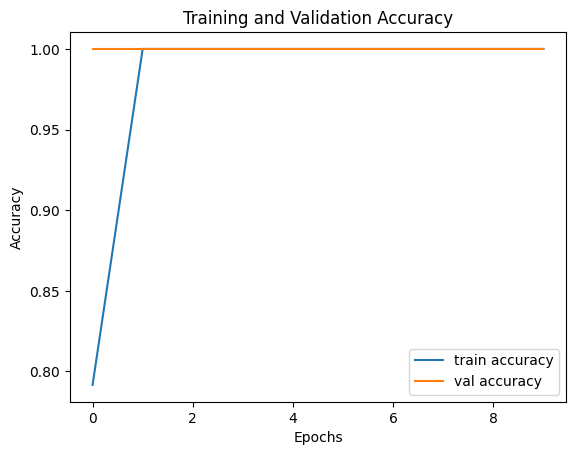

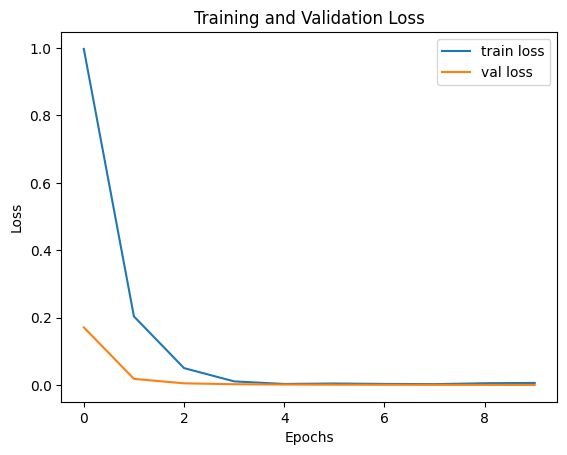

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [24]:
# Path to the test_batches directory
test_batch_dir = "/home/ashish/Warepro/door_images/test_batches"

# Get the list of batch files for images and labels
test_image_files = sorted([f for f in os.listdir(test_batch_dir) if 'images.npy' in f])
test_label_files = sorted([f for f in os.listdir(test_batch_dir) if 'labels.npy' in f])

# Check if both lists of files are equal
assert len(test_image_files) == len(test_label_files), "Mismatch between number of test image and label batches!"

# Initialize empty lists to store all test images and labels
all_test_images = []
all_test_labels = []

# Load each batch dynamically
for test_image_file, test_label_file in zip(test_image_files, test_label_files):
    # Load the test image and label batches
    batch_test_images = np.load(os.path.join(test_batch_dir, test_image_file))
    batch_test_labels = np.load(os.path.join(test_batch_dir, test_label_file))
    
    # Append to the lists
    all_test_images.append(batch_test_images)
    all_test_labels.append(batch_test_labels)

# Convert lists into numpy arrays
test_images = np.concatenate(all_test_images, axis=0)
test_labels = np.concatenate(all_test_labels, axis=0)

# Print the shapes to confirm
print(f"Test data shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")


Test data shape: (240, 64, 64, 3)
Test labels shape: (240, 3)


In [26]:
sequence_length = 20
test_sequences = []

for i in range(0, len(test_images) - sequence_length, sequence_length):
    test_sequences.append(test_images[i:i + sequence_length])

test_sequences = np.array(test_sequences)
print(f"Shape of test sequences: {test_sequences.shape}")


Shape of test sequences: (11, 20, 64, 64, 3)


In [27]:
predictions = model.predict(test_sequences)
print(f"Predictions shape: {predictions.shape}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predictions shape: (11, 3)


In [28]:
predicted_classes = np.argmax(predictions, axis=1)
print(f"Predicted classes: {predicted_classes}")


Predicted classes: [0 0 0 0 0 0 0 0 0 0 0]
